# It's an exercise in data visualization using Python's matplotlib and pandas libraries. 
#### We'll visualize the distribution of different species of flowers in the famous Iris dataset.

# Install the Libraries

In [8]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/0c/2a/d3ff6091406bc2207e0adb832ebd15e40ac685811c7e2e3b432bfd969b71/scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/6b/d4/d62ce38ba00dc67d7ec4ec5cc19d36958d8ed70e63778715ad626bcbc796/scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 9.6 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
  

# Import Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Data
### Load the Iris dataset. It's a classic dataset for classification and visualization.

In [10]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)


# Basic Data Exploration
#### Take a quick look at the data.

In [11]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Plotting
#### Now, let's create a scatter plot to visualize the sepal length and width of different species.

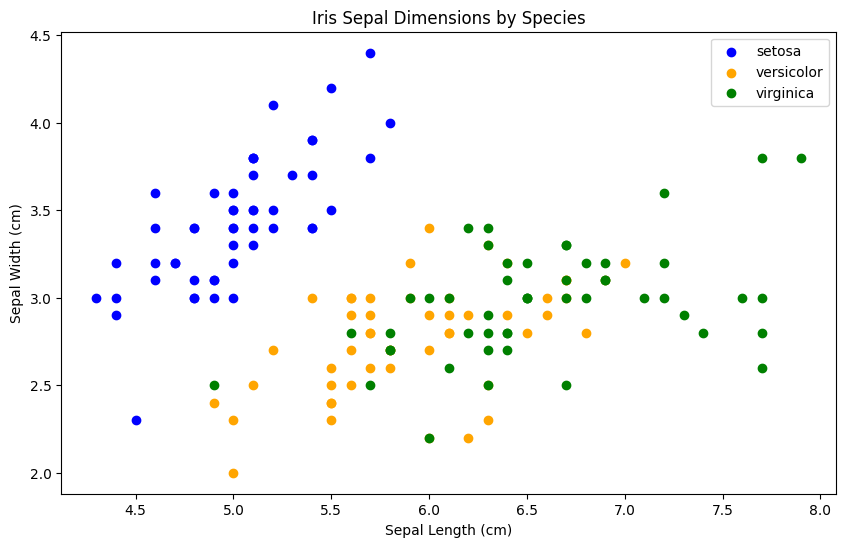

In [12]:
plt.figure(figsize=(10, 6))
for species, color in zip(iris_df['species'].unique(), ['blue', 'orange', 'green']):
    subset = iris_df[iris_df['species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], label=species, color=color)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Sepal Dimensions by Species')
plt.legend()
plt.show()

# Experiment and Explore
#### Feel free to experiment with different types of plots like histograms or box plots. You can also try visualizing petal dimensions.

array([[<Axes: title={'center': 'petal length (cm)'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal width (cm)'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal length (cm)'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal width (cm)'}, xlabel='[species]'>]],
      dtype=object)

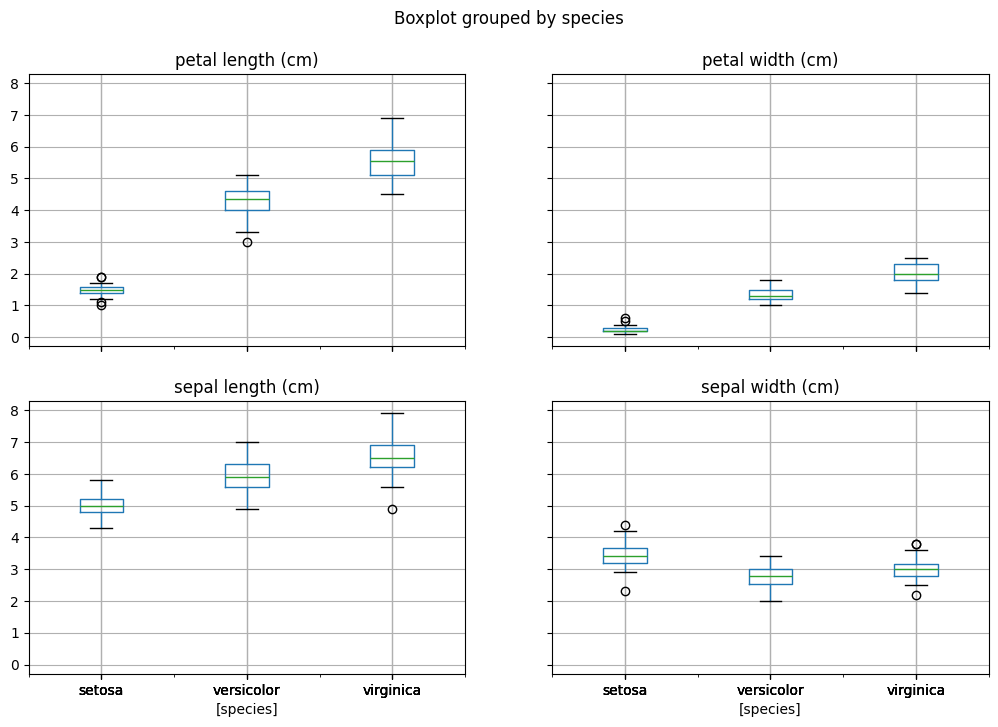

In [13]:
iris_df.boxplot(by='species', figsize=(12, 8))

# 3D Visualization
#### Visualize the data in three dimensions for a different perspective.

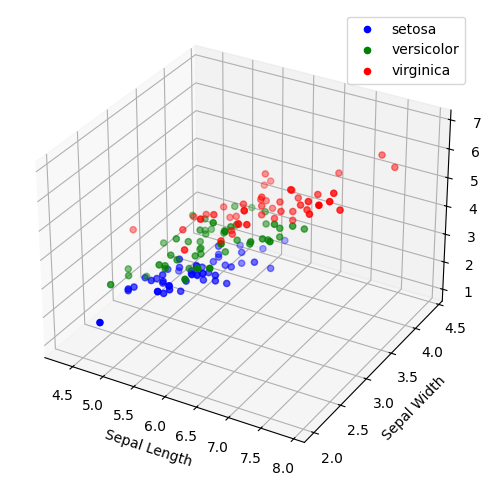

In [46]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

species = ['setosa', 'versicolor', 'virginica']
colors = ['blue', 'green', 'red']

for spec, color in zip(species, colors):
    ax.scatter(iris_df[iris_df['species'] == spec]['sepal length (cm)'],
               iris_df[iris_df['species'] == spec]['sepal width (cm)'],
               iris_df[iris_df['species'] == spec]['petal length (cm)'],
               label=spec, color=color)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.legend()
plt.show()

# K-Means Clustering
#### This unsupervised learning algorithm partitions the data into K clusters, where each data point belongs to the cluster with the nearest mean.

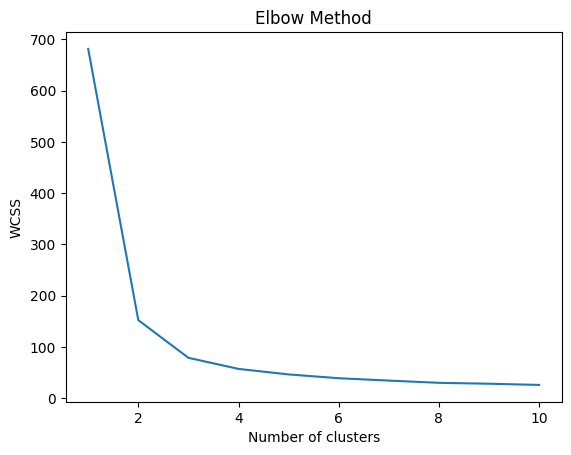

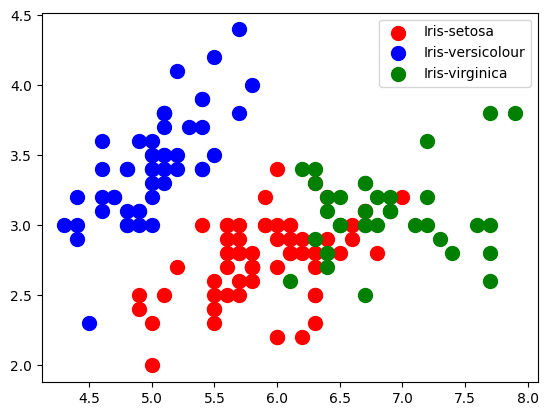

In [67]:
from sklearn.cluster import KMeans

# Determining the number of clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(iris_df.iloc[:, :-1])
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

# Applying kmeans to the dataset
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(iris_df.iloc[:, :-1])

# Visualizing the clusters
plt.scatter(iris_df.iloc[y_kmeans == 0, 0], iris_df.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(iris_df.iloc[y_kmeans == 1, 0], iris_df.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(iris_df.iloc[y_kmeans == 2, 0], iris_df.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.legend()
plt.show()


# Logistic Regression for Species Prediction
#### Logistic regression is a fundamental classification technique. It's simple yet effective for binary and multi-class classification problems.

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare the data
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create an instance of LogisticRegression and fit the data
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Checking accuracy
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.98


# Decision Tree Classifier
#### Decision trees are powerful for classification and regression tasks. They are intuitive and easy to interpret.

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Creating and training a decision tree model
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Conclusion
These analyses and visualizations offer deeper insights into the Iris dataset and showcase various data science techniques, including machine learning, statistical analysis, and data visualization. By exploring different approaches, you can uncover hidden patterns and relationships within the data, demonstrating the versatility and depth of analysis possible even with a relatively simple dataset like Iris.